In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import gc
import datetime
import re
import seaborn as sns

/Users/ujjwal/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#importing dataset
df=pd.read_csv('transaction_data.csv')
df.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083818 entries, 0 to 1083817
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   UserId                  1083818 non-null  int64  
 1   TransactionId           1083818 non-null  int64  
 2   TransactionTime         1083818 non-null  object 
 3   ItemCode                1083818 non-null  int64  
 4   ItemDescription         1080910 non-null  object 
 5   NumberOfItemsPurchased  1083818 non-null  int64  
 6   CostPerItem             1083818 non-null  float64
 7   Country                 1083818 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 66.2+ MB


In [4]:
df.describe()


,UserId,TransactionId,ItemCode,NumberOfItemsPurchased,CostPerItem
count,1.083818e+06,1.083818e+06,1.083818e+06,1.083818e+06,1.083818e+06
mean,2.410162e+05,6.159417e+06,6.582687e+05,2.865675e+01,9.498798e+00
std,1.423364e+05,1.476341e+05,4.526314e+05,6.542432e+02,2.308139e+03
min,-1.000000e+00,5.900015e+06,-1.000000e+00,-2.429850e+05,-1.526564e+04
25%,2.593920e+05,6.026856e+06,4.609080e+05,3.000000e+00,1.730000e+00
50%,3.020220e+05,6.166611e+06,4.752930e+05,9.000000e+00,2.880000e+00
75%,3.413550e+05,6.289569e+06,4.889430e+05,3.000000e+01,5.700000e+00
max,3.840270e+05,6.397457e+06,1.894494e+06,2.429850e+05,1.696285e+06


In [5]:
# changing the format of the time
df['TransactionTime']=pd.to_datetime(df['TransactionTime'])
df.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,2019-02-02 12:50:00+05:30,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,2018-12-26 09:06:00+05:30,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,2019-02-15 09:45:00+05:30,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,2018-06-22 07:14:00+05:30,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,2018-09-10 11:58:00+05:30,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom


In [6]:
df.isnull().sum().sort_values(ascending=False)

ItemDescription           2908
Country                      0
CostPerItem                  0
NumberOfItemsPurchased       0
ItemCode                     0
TransactionTime              0
TransactionId                0
UserId                       0
dtype: int64

In [8]:
# dealing with missing categorical values by dropping them
df_new = df.dropna()
df_new.isnull().sum().sort_values(ascending=False)

Country                   0
CostPerItem               0
NumberOfItemsPurchased    0
ItemDescription           0
ItemCode                  0
TransactionTime           0
TransactionId             0
UserId                    0
dtype: int64

In [9]:
df_new['UserId'] = df_new['UserId'].astype('str') #converting invoice number to be string

/Users/ujjwal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1080910 entries, 0 to 1083817
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype                                
---  ------                  --------------    -----                                
 0   UserId                  1080910 non-null  object                               
 1   TransactionId           1080910 non-null  int64                                
 2   TransactionTime         1080910 non-null  datetime64[ns, pytz.FixedOffset(330)]
 3   ItemCode                1080910 non-null  int64                                
 4   ItemDescription         1080910 non-null  object                               
 5   NumberOfItemsPurchased  1080910 non-null  int64                                
 6   CostPerItem             1080910 non-null  float64                              
 7   Country                 1080910 non-null  object                               
dtypes: datetime64[ns, pytz.FixedOffse

In [12]:
# dealing with negative Values
df_new = df_new[df_new.NumberOfItemsPurchased > 0]
df_new = df_new[df_new.CostPerItem > 0]
df_new = df_new[df_new.TransactionId > 0]
df_new = df_new[df_new.ItemCode > 0]

df_new.describe()

,TransactionId,ItemCode,NumberOfItemsPurchased,CostPerItem
count,1.055812e+06,1.055812e+06,1.055812e+06,1.055812e+06
mean,6.159868e+06,6.608518e+05,3.169417e+01,7.743458e+00
std,1.477574e+05,4.505984e+05,4.674377e+02,2.334645e+03
min,5.900015e+06,4.200000e+01,3.000000e+00,6.000000e-02
25%,6.027010e+06,4.614960e+05,3.000000e+00,1.730000e+00
50%,6.167876e+06,4.753560e+05,9.000000e+00,2.880000e+00
75%,6.290427e+06,4.889640e+05,3.300000e+01,5.700000e+00
max,6.397457e+06,1.894494e+06,2.429850e+05,1.696285e+06


In [13]:
# using anount spent= price * quantity
df_new['amount_spent'] = df_new['NumberOfItemsPurchased'] * df_new['CostPerItem']

In [14]:
# adding column for amount_spent in the dataset
df_new=df_new[['UserId','TransactionId','TransactionTime','ItemCode','ItemDescription','NumberOfItemsPurchased','CostPerItem','amount_spent','Country']]

df_new.head()


,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,amount_spent,Country
0,278166,6355745,2019-02-02 12:50:00+05:30,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,70.38,United Kingdom
1,337701,6283376,2018-12-26 09:06:00+05:30,482370,LONDON BUS COFFEE MUG,3,3.52,10.56,United Kingdom
2,267099,6385599,2019-02-15 09:45:00+05:30,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,64.80,France
3,380478,6044973,2018-06-22 07:14:00+05:30,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,5.19,United Kingdom
4,-1,6143225,2018-09-10 11:58:00+05:30,1733592,WASHROOM METAL SIGN,3,3.40,10.20,United Kingdom


In [15]:
items_purchased=df[['Country','ItemDescription','UserId','NumberOfItemsPurchased']]
purchased=items_purchased.groupby(['Country','UserId','ItemDescription']).sum().sort_values(by='NumberOfItemsPurchased',ascending=False)

In [16]:
purchased.head()

NumberOfItemsPurchased
Country        UserId  ItemDescription                                          
United Kingdom  278376 ASSTD DESIGN 3D PAPER STICKERS                      75240
                342993 WORLD WAR 2 GLIDERS ASSTD DESIGNS                   60480
                344862 BROCADE RING PURSE                                  60462
                376929 POPCORN HOLDER                                      55752
               -1      CHARLOTTE BAG SUKI DESIGN                           55002

In [17]:
purchased.to_csv('purchased.csv')

In [18]:
Agg=df[['Country','NumberOfItemsPurchased','CostPerItem']]
Agg=Agg.groupby(['Country']).agg({'NumberOfItemsPurchased':['min','max','sum'],'CostPerItem':'mean'})
Agg

NumberOfItemsPurchased                   CostPerItem
                                        min     max       sum        mean
Country                                                                  
Australia                              -360    3456    501918    4.449960
Austria                                -144     864     28962    5.860973
Bahrain                                -162     288      1560    6.294211
Belgium                                 -36     816    138912    5.034215
Brazil                                    6      72      2136    6.155000
Canada                                    3    1512     16578    8.326689
Channel Islands                          -6    1221     56874    6.811821
Cyprus                                  -99     864     37902    8.703232
Czech Republic                          -72     216      3552    4.060333
Denmark                                 -75     768     49128    4.499537
EIRE                                   -864    4320    855822    8.162849
European Community                       -6      72      2982    6.658525
Finland                                 -81     432     63996    7.524547
France                                 -750    2736    662880    6.944908
Germany                                -864    1800    704688    5.479567
Greece                                   -3     144      9336    6.747671
Hong Kong                                -3     432     28614   58.662917
Iceland                                   6     720     14748    3.654011
Israel                                  -96     300     26118    5.019293
Italy                                   -36     600     47994    6.672740
Japan                                 -1872    6120    151308    3.145922
Lebanon                                   6      72      2316    7.440667
Lithuania                                18     144      3912    3.925143
Malta                                   -12     144      5664    7.243150
Netherlands                           -1440    7200   1200768    3.784028
Norway                                  -36     720    115482    8.301805
Poland                                  -18     216     21918    5.761437
Portugal                                -36     360     97080   11.850026
RSA                                       3      36      2112    5.908793
Saudi Arabia                            -15      36       450    3.333000
Singapore                                -3     864     31404  151.316332
Spain                                  -864    1080    160944    6.888417
Sweden                                 -720    2304    213822    5.401753
Switzerland                            -360     864    181950    4.701988
USA                                    -108     216      6204    3.063814
United Arab Emirates                      3     216      5892    4.670441
United Kingdom                      -242985  242985  25582974    9.683529
Unspecified                               3     144     19800    3.730359

In [19]:
Agg.to_csv('Agg.csv')

In [21]:
money_spent = df_new.groupby(by=['Country'], as_index=False)['amount_spent'].sum()
money_spent


,Country,amount_spent
0,Australia,1.146684e+06
1,Austria,7.252560e+04
2,Bahrain,6.253800e+03
3,Belgium,3.063623e+05
4,Brazil,9.479640e+03
5,Canada,2.586336e+04
6,Channel Islands,1.671967e+05
7,Cyprus,1.099221e+05
8,Czech Republic,6.538800e+03
9,Denmark,1.510295e+05


In [22]:
money_spent.to_csv('money_spent.csv')

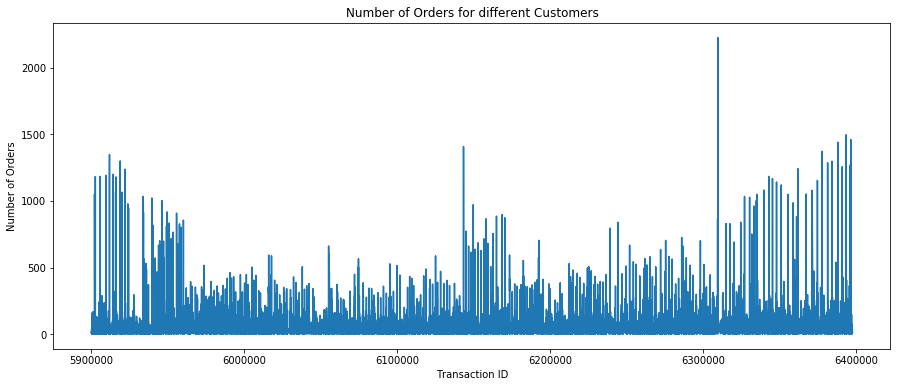

In [23]:
orders=df_new.groupby(by=['TransactionId','Country'], as_index=False)['UserId'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.TransactionId, orders.UserId)
plt.xlabel('Transaction ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()


In [24]:
print('The TOP 5 customers with most number of orders...')
orders.sort_values(by='UserId', ascending=False).head()

The TOP 5 customers with most number of orders...


,TransactionId,Country,UserId
16196,6309435,United Kingdom,2226
19617,6393409,United Kingdom,1496
19747,6396412,United Kingdom,1460
19389,6388019,United Kingdom,1440
9520,6143225,United Kingdom,1408


In [26]:
print('The TOP 5 customers with highest money spent...')
money_spent.sort_values(by='amount_spent', ascending=False).head()

The TOP 5 customers with highest money spent...


,TransactionId,Country,amount_spent
25,5900323,United Kingdom,40710850.56
19740,6396313,United Kingdom,699796.80
2108,5955741,United Kingdom,320608.80
8633,6120884,United Kingdom,161335.80
1866,5948965,United Kingdom,20944.20


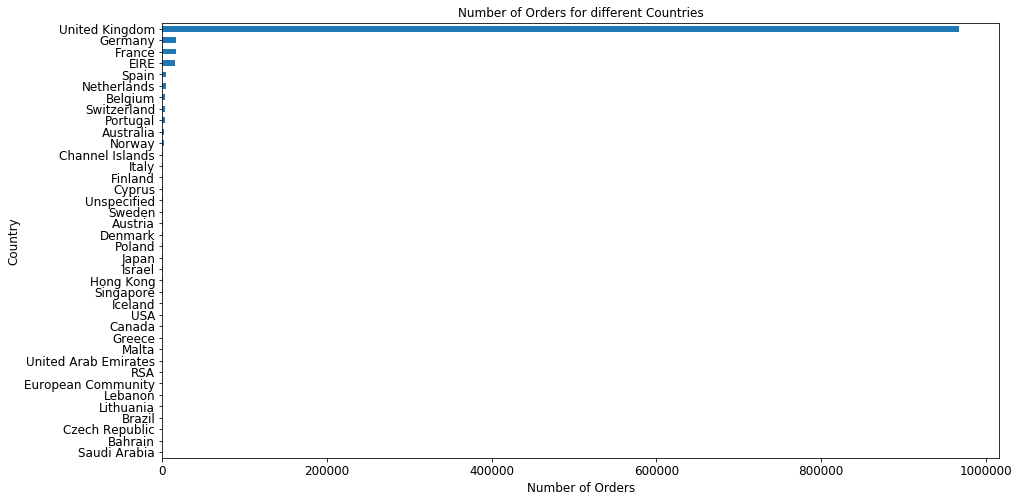

In [27]:
group_country_orders = df_new.groupby('Country')['NumberOfItemsPurchased'].count().sort_values()


plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

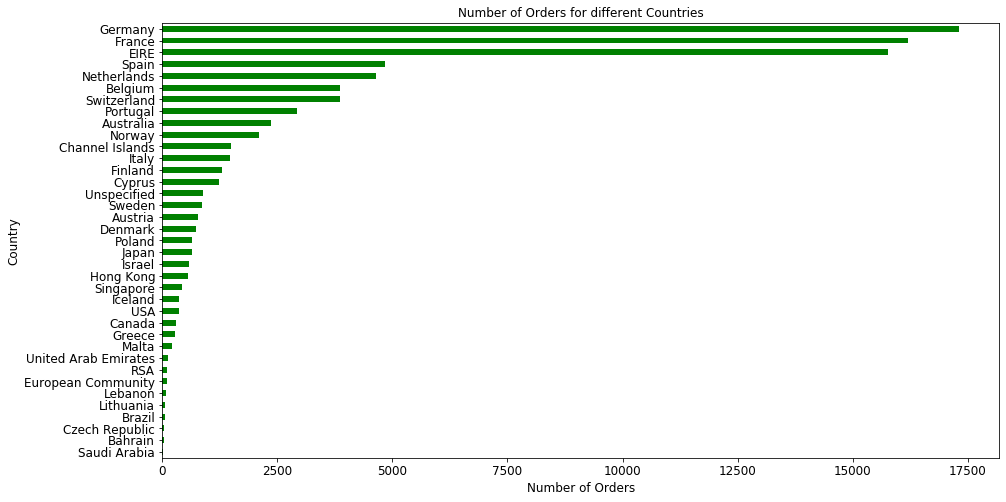

In [28]:
group_country_orders = df_new.groupby('Country')['NumberOfItemsPurchased'].count().sort_values()
del group_country_orders['United Kingdom']


plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12, color='green')
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

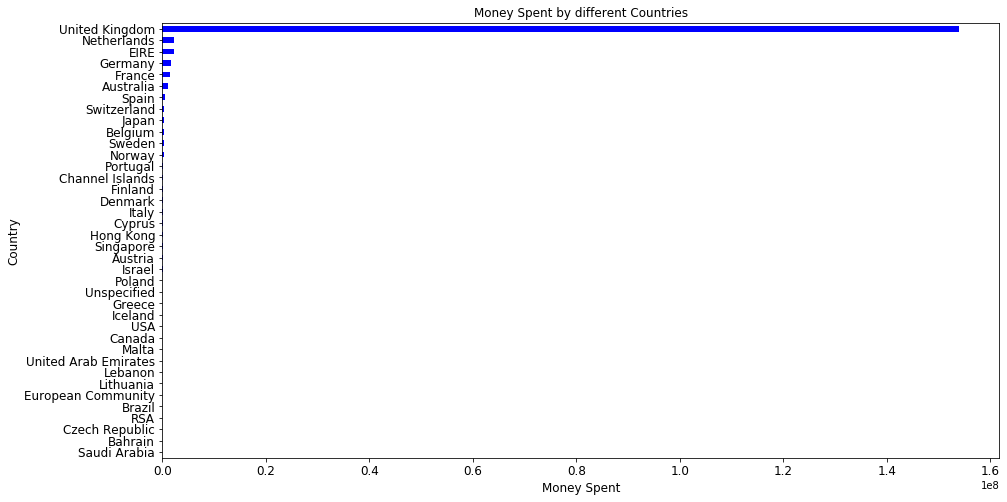

In [29]:
# How much money spent by each country
group_country_amount_spent = df_new.groupby('Country')['amount_spent'].sum().sort_values()

plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12, color='blue')
plt.xlabel('Money Spent', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()